# Creative Gaming: Propensity-to-Buy Modeling

* Team-lead GitHub userid: rsm-roguchi
* Group name: Group 2
* Team member names:
    - Rachel Wang
    - Jaqueline Vallejo 
    - Qiyong Zhang
    - Ryosuke Oguchi

## Setup

Please complete this python notebook with your group by answering the questions in `cg-prop-msba.pdf`. Create a Notebook with all your results and comments and push both the Notebook to GitHub when your team is done.

Make sure to connect the GitHub repo to GradeScope before the due date. Only one member from your team should submit through GradeScope, and they should select team members names in GradeScope.

All results MUST be reproducible (i.e., the TA and I must be able to recreate your output from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the RSM-MSBA docker container.

> Note: Please do not install any packages as part of your Jupyter Notebook submission

This is the second group assignment for MGTA 455 and you will be using Git and GitHub. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's changes to accept. The team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitHub. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `question1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file
* If you are going to work simultaneously, do it in different notebooks, e.g.,
    - question1.ipynb, question2.ipynb, question3.ipynb
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:

![](images/github-group-workflow.png)

In [3]:
import pandas as pd
import pyrsm as rsm

In [4]:
## in a jupyter notebook setup pyrsm fo
## autoreload when you edit code and save
## code in the pyrsm repo
## nothing else needed!
%reload_ext autoreload
%autoreload 2
%aimport pyrsm

In [5]:
## loading the data - this dataset must NOT be changed
cg_organic = pd.read_parquet("data/cg_organic.parquet")
rsm.md("data/cg_organic_description.md")

## Creative gaming

Game telemetry dataset used for the Creative Gaming: Propensity-to-Buy Modeling case

#### Feature descriptions

* converted: Purchased the Zalon campain ("yes" or "no")
* GameLevel: Highest level of game achieved by the user
* NumGameDays: Number of days user played the game in last month (with or without network connection)
* NumGameDays4Plus: Number of days user played the game in last month with 4 or more total users (this implies using a network connection)
* NumInGameMessagesSent: Number of in-game messages sent to friends
* NumFriends: Number of friends to which the user is connected (necessary to crew together in multiplayer mode) 
* NumFriendRequestIgnored: Number of friend requests this user has not replied to since game inception
* NumSpaceHeroBadges: Number of "Space Hero" badges, the highest distinction for gameplay in Space Pirates
* AcquiredSpaceship: Flag if the user owns a spaceship, i.e., does not have to crew on another user's or NPC's space ship ("no" or "yes")
* AcquiredIonWeapon: Flag if the user owns the powerful "ion weapon" ("no" or "yes")
* TimesLostSpaceship: The number of times the user destroyed his/her spaceship during gameplay. Spaceships need to be re-acquired if destroyed.
* TimesKilled: Number of times the user was killed during gameplay
* TimesCaptain: Number of times in last month that the user played in the role of a captain
* TimesNavigator: Number of times in last month that the user played in the role of a navigator
* PurchasedCoinPackSmall: Flag if the user purchased a small pack of Zathium in last month ("no" or "yes")
* PurchasedCoinPackLarge: Flag if the user purchased a large pack of Zathium in last month ("no" or "yes")
* NumAdsClicked: Number of in-app ads the user has clicked on
* DaysUser: Number of days since user established a user ID with Creative Gaming (for Space Pirates or previous games)
* UserConsole: Flag if the user plays Creative Gaming games on a console ("no" or "yes")
* UserHasOldOS: Flag if the user has iOS version 10 or earlier ("no" or "yes")
* training: Dummy variable that splits the dataset into a training (1) and test (0) dataset


In [6]:
# run python code from another notebook
%run ./sub-notebooks/question1.ipynb

Logistic regression (GLM)
Data                 : cg_organic
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus
Null hyp.: There is no effect of x on converted
Alt. hyp.: There is an effect of x on converted

                     OR     OR%  coefficient  std.error  z.value p.value     
Intercept         0.020  -98.0%        -3.92      0.080  -48.809  < .001  ***
GameLevel         1.106   10.6%         0.10      0.011    9.361  < .001  ***
NumGameDays       1.028    2.8%         0.03      0.004    6.689  < .001  ***
NumGameDays4Plus  1.053    5.3%         0.05      0.006    8.538  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.028
Pseudo R-squared (McFadden adjusted): 0.027
Area under the RO Curve (AUC): 0.635
Log-likelihood: -6420.805, AIC: 12849.609, BIC: 12882.845
Chi-squared: 365.936, df(3), p.value < 0.001 
Nr obs: 30,000


In [7]:
# load a custom python module
from utils.functions import example

example()


You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates



# Part 1: EDA

## Q1

In [8]:
cg_organic['converted'].value_counts(normalize=True)

converted
no     0.942467
yes    0.057533
Name: proportion, dtype: float64

## Q2

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
cg_organic.dtypes

converted                  category
GameLevel                     int32
NumGameDays                   int32
NumGameDays4Plus              int32
NumInGameMessagesSent         int32
NumSpaceHeroBadges            int32
NumFriendRequestIgnored       int32
NumFriends                    int32
AcquiredSpaceship          category
AcquiredIonWeapon          category
TimesLostSpaceship            int32
TimesKilled                   int32
TimesCaptain                  int32
TimesNavigator                int32
PurchasedCoinPackSmall     category
PurchasedCoinPackLarge     category
NumAdsClicked                 int32
DaysUser                      int32
UserConsole                category
UserHasOldOS               category
training                      int32
dtype: object

numeric

In [11]:
num_features = (['GameLevel', 'NumGameDays', 'NumGameDays4Plus', 'NumInGameMessagesSent', 'NumSpaceHeroBadges', 'NumFriendRequestIgnored', 'NumFriends',
                'TimesLostSpaceship', 'TimesKilled', 'TimesCaptain', 'TimesNavigator', 'NumAdsClicked', 'DaysUser'])

In [12]:
num_ss = cg_organic[num_features].agg(['nunique', 'mean', 'min', 'max', 'std']).T
num_ss

,nunique,mean,min,max,std
GameLevel,10.0,6.246733,1.0,10.0,2.774055
NumGameDays,28.0,12.241400,1.0,28.0,7.097305
NumGameDays4Plus,25.0,1.257267,0.0,24.0,3.191210
NumInGameMessagesSent,641.0,73.777400,0.0,1227.0,107.441593
NumSpaceHeroBadges,13.0,0.443933,0.0,12.0,1.517762
NumFriendRequestIgnored,122.0,29.589100,0.0,121.0,33.990783
NumFriends,485.0,47.733833,0.0,486.0,94.329939
TimesLostSpaceship,143.0,4.435567,0.0,298.0,11.546392
TimesKilled,72.0,0.293400,0.0,178.0,3.415129
TimesCaptain,120.0,1.583033,0.0,429.0,8.770534


non-numeric

In [13]:
cat_features = (['converted', 'AcquiredSpaceship', 'AcquiredIonWeapon', 'PurchasedCoinPackSmall', 'PurchasedCoinPackLarge', 'UserConsole', 'UserHasOldOS'])

In [14]:
# number of missing
def numna(series):
    return series.isna().sum()
# most common level
def most_common(series):
    return series.value_counts().idxmax()
# least common level
def least_common(series):
    return series.value_counts().idxmin()

In [15]:
count_na = pd.DataFrame(cg_organic[cat_features].apply(numna), columns=['num_na'])
find_mode = pd.DataFrame(cg_organic[cat_features].apply(most_common), columns=['most_common'])
find_antimode = pd.DataFrame(cg_organic[cat_features].apply(least_common), columns=['least_common'])
unique_levels = cg_organic[cat_features].agg(['nunique']).T
cat_ss = pd.concat([count_na, find_mode, find_antimode, unique_levels], axis=1)

In [16]:
# num_ob? num_missing?
num_ss

,nunique,mean,min,max,std
GameLevel,10.0,6.246733,1.0,10.0,2.774055
NumGameDays,28.0,12.241400,1.0,28.0,7.097305
NumGameDays4Plus,25.0,1.257267,0.0,24.0,3.191210
NumInGameMessagesSent,641.0,73.777400,0.0,1227.0,107.441593
NumSpaceHeroBadges,13.0,0.443933,0.0,12.0,1.517762
NumFriendRequestIgnored,122.0,29.589100,0.0,121.0,33.990783
NumFriends,485.0,47.733833,0.0,486.0,94.329939
TimesLostSpaceship,143.0,4.435567,0.0,298.0,11.546392
TimesKilled,72.0,0.293400,0.0,178.0,3.415129
TimesCaptain,120.0,1.583033,0.0,429.0,8.770534


In [17]:
# num_ob?
cat_ss

,num_na,most_common,least_common,nunique
converted,0,no,yes,2
AcquiredSpaceship,0,no,yes,2
AcquiredIonWeapon,0,no,yes,2
PurchasedCoinPackSmall,0,no,yes,2
PurchasedCoinPackLarge,0,no,yes,2
UserConsole,0,yes,no,2
UserHasOldOS,0,no,yes,2


## Q3

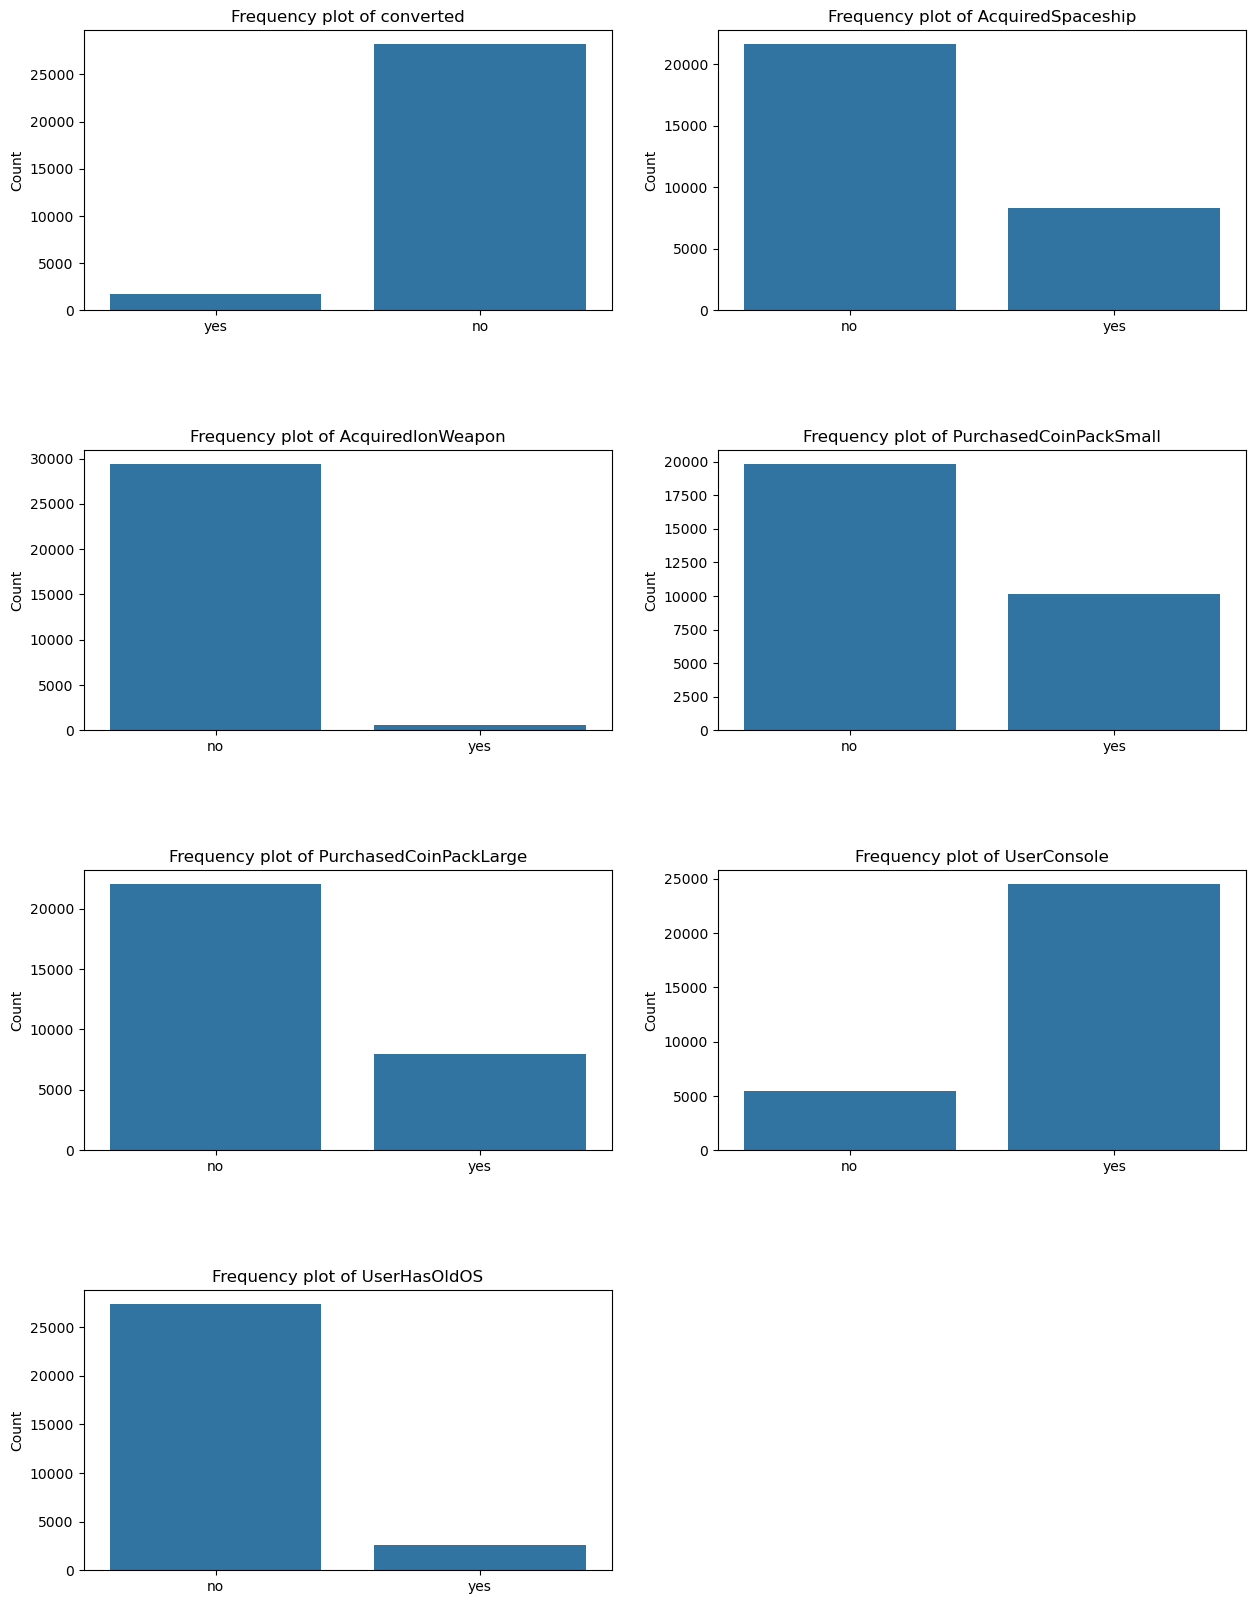

In [18]:
import seaborn as sns

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each categorical feature
for i, feature in enumerate(cat_features):
    sns.countplot(data=cg_organic, x=feature, ax=axes[i])
    axes[i].set_title(f'Frequency plot of {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

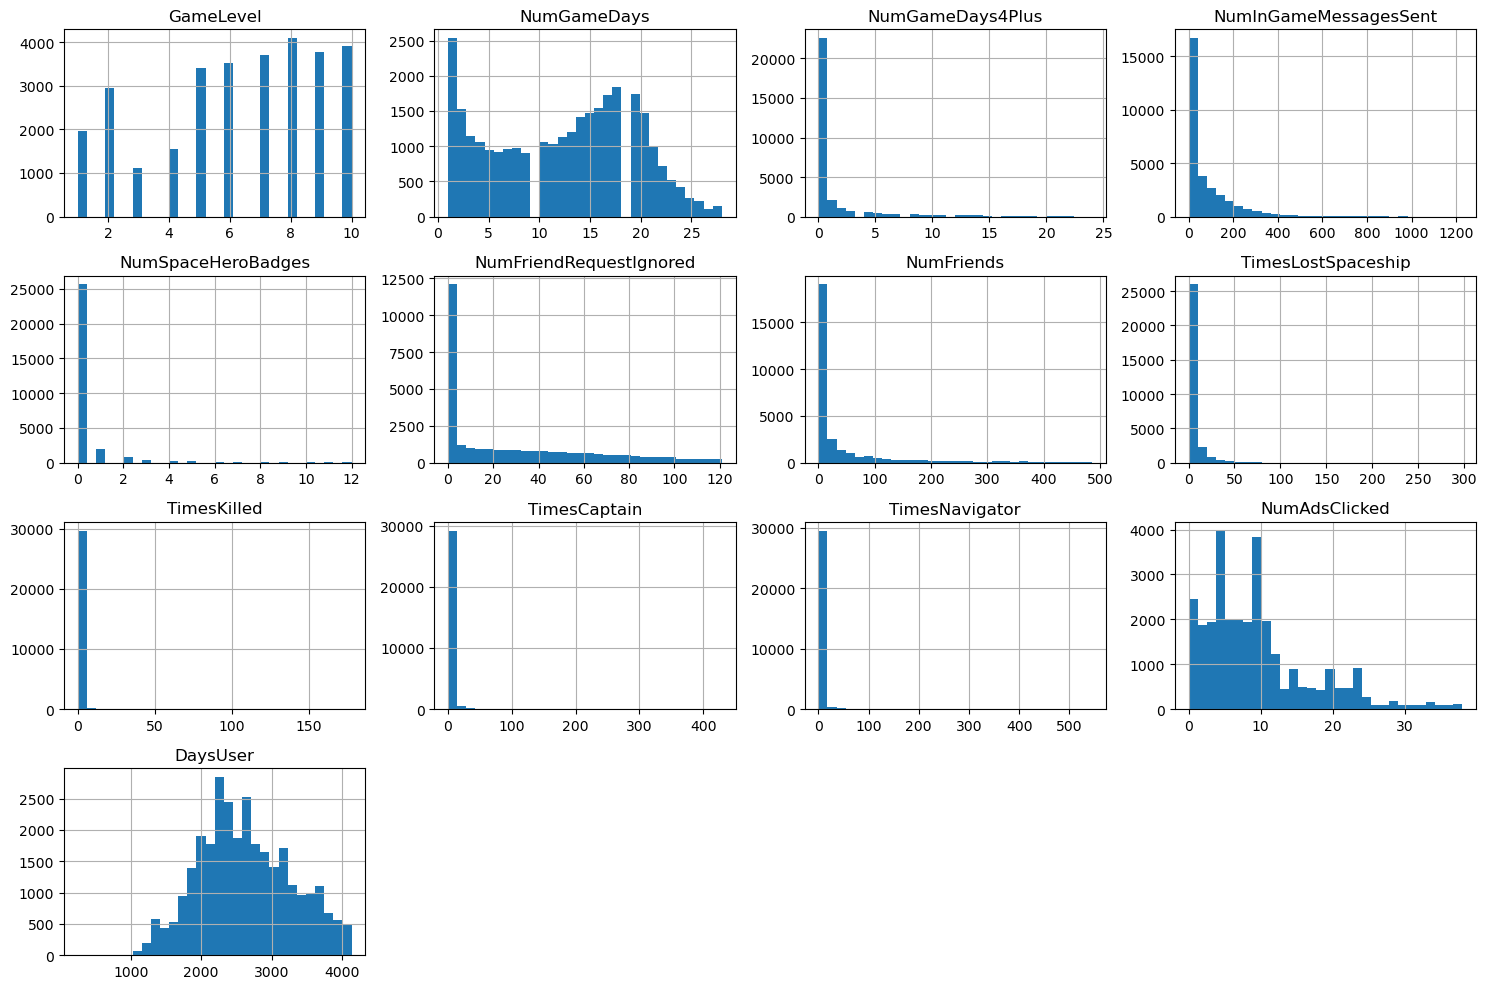

In [19]:
cg_organic[num_features].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Part II

In [20]:
cg_organic.head()

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,training
0,no,10,11,0,355,0,8,3,yes,no,...,0,5,0,no,no,4,2953,yes,yes,1
1,no,6,7,1,30,0,0,0,yes,no,...,0,0,0,no,yes,8,2343,yes,no,1
2,no,8,2,0,69,0,111,13,no,no,...,0,0,0,yes,no,11,2374,yes,no,1
3,no,5,3,0,40,0,33,1,no,no,...,0,2,0,no,no,3,2708,yes,no,1
4,no,6,15,0,5,0,62,0,no,no,...,0,0,0,no,no,11,2101,yes,yes,0


In [21]:
evars = cg_organic.drop(columns=['training', 'converted']).columns
evars

Index(['GameLevel', 'NumGameDays', 'NumGameDays4Plus', 'NumInGameMessagesSent',
       'NumSpaceHeroBadges', 'NumFriendRequestIgnored', 'NumFriends',
       'AcquiredSpaceship', 'AcquiredIonWeapon', 'TimesLostSpaceship',
       'TimesKilled', 'TimesCaptain', 'TimesNavigator',
       'PurchasedCoinPackSmall', 'PurchasedCoinPackLarge', 'NumAdsClicked',
       'DaysUser', 'UserConsole', 'UserHasOldOS'],
      dtype='object')

In [22]:
clf = rsm.model.logistic(
    data={'CG': cg_organic[cg_organic['training'] == 1]},
    evar=evars,
    rvar='converted',
    lev='yes'
)
clf.summary()

Logistic regression (GLM)
Data                 : CG
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Null hyp.: There is no effect of x on converted
Alt. hyp.: There is an effect of x on converted

                                OR     OR%  coefficient  std.error  z.value p.value     
Intercept                    0.009  -99.1%        -4.75      0.190  -24.997  < .001  ***
AcquiredSpaceship[yes]       1.713   71.3%         0.54      0.072    7.486  < .001  ***
AcquiredIonWeapon[yes]       1.613   61.3%         0.48      0.203    2.353   0.019    *
PurchasedCoinPackSmall[yes]  0.912   -8.8%        -0.09      0.070   -1.316   0.188     
P

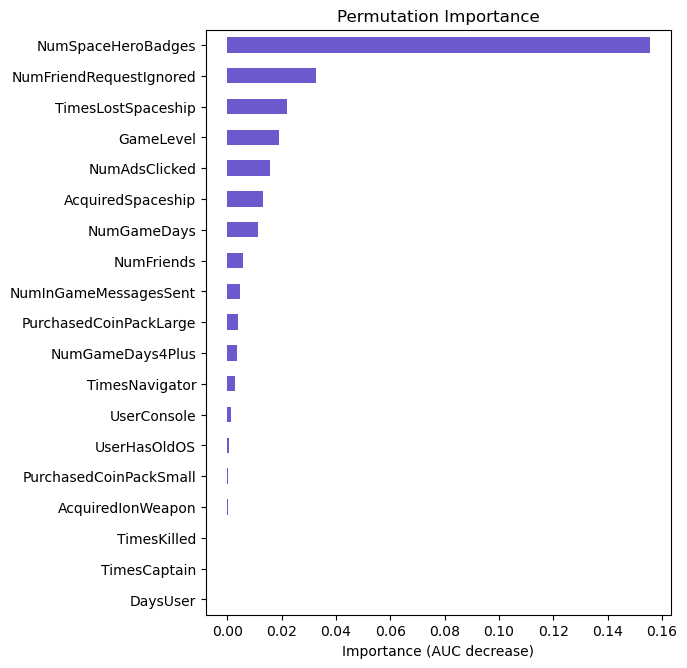

In [23]:
clf.plot('vimp')

In [24]:
top_5 = ['NumSpaceHeroBadges', 'NumFriendRequestIgnored', 'TimesLostSpaceship', 'GameLevel', 'NumAdsClicked']
top_5

['NumSpaceHeroBadges',
 'NumFriendRequestIgnored',
 'TimesLostSpaceship',
 'GameLevel',
 'NumAdsClicked']

## Q2

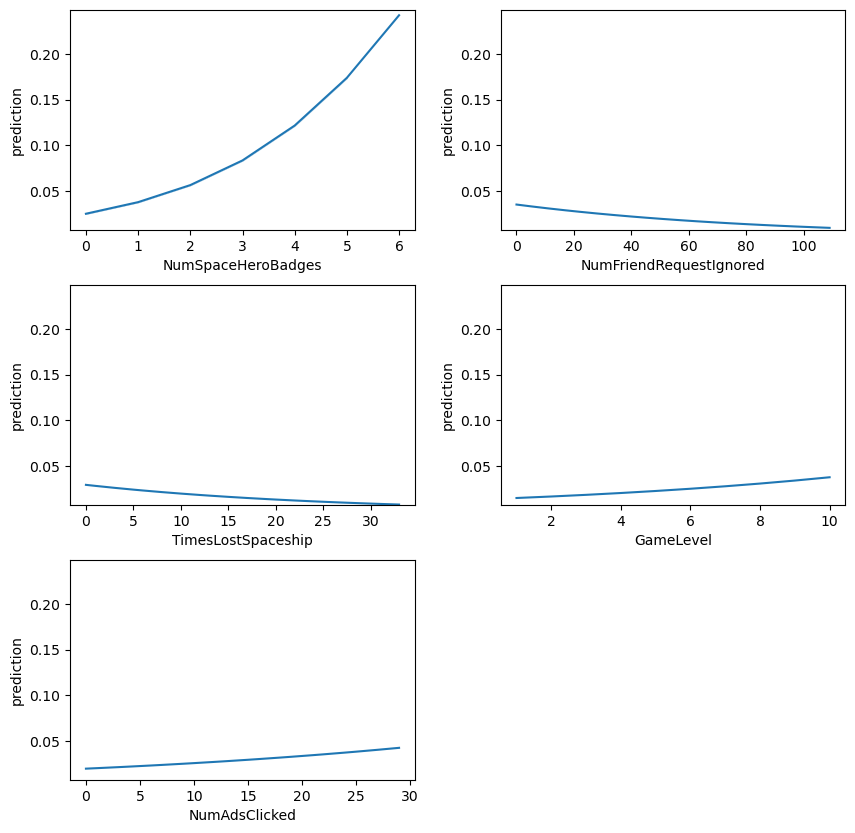

In [25]:
clf.plot('pred', incl=top_5)

## Prediction Plots Summary  

- **`NumSpaceHeroBadges` Plot:**  
  The probability of purchasing the Zalon campaign increases above 0.20 as the number of "Space Hero" badges rises, holding all else constant.  

- **`NumFriendRequestIgnored` & `TimesLostSpaceship` Plots:**  
  The probability of purchasing the Zalon campaign **slightly decreases below 0.5** as the number of ignored friend requests and spaceship losses increase, holding all else constant.  

- **`GameLevel` & `NumAdsClicked` Plots:**  
  The probability of purchasing the Zalon campaign **slightly increases to 0.5** as the user's highest game level and in-app ad clicks rise, holding all else constant.  

## Q3

In [26]:
cg_organic['pred_logit'] = clf.predict(cg_organic)['prediction']
cg_organic.head()

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,training,pred_logit
0,no,10,11,0,355,0,8,3,yes,no,...,5,0,no,no,4,2953,yes,yes,1,0.073430
1,no,6,7,1,30,0,0,0,yes,no,...,0,0,no,yes,8,2343,yes,no,1,0.056571
2,no,8,2,0,69,0,111,13,no,no,...,0,0,yes,no,11,2374,yes,no,1,0.008457
3,no,5,3,0,40,0,33,1,no,no,...,2,0,no,no,3,2708,yes,no,1,0.014371
4,no,6,15,0,5,0,62,0,no,no,...,0,0,no,no,11,2101,yes,yes,0,0.016892


## Q4

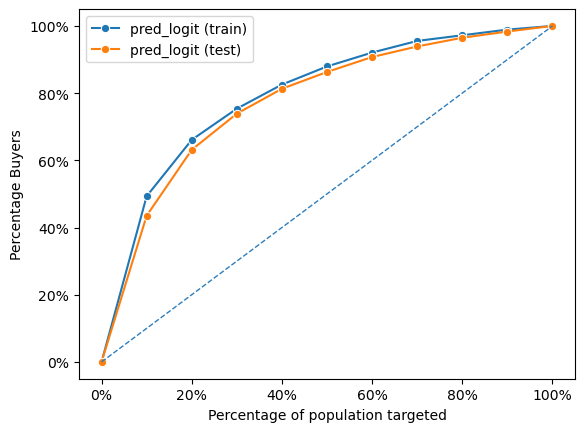

In [27]:
dct = {"train": cg_organic[cg_organic.training == 1], "test": cg_organic[cg_organic.training == 0]}
fig = rsm.gains_plot(dct, "converted", "yes", "pred_logit")

## Q5

In [28]:
from sklearn.metrics import roc_auc_score

In [29]:
train_set = cg_organic[cg_organic['training'] == 1]
test_set = cg_organic[cg_organic['training'] == 0]

In [30]:
roc_auc_score(train_set['converted'], train_set['pred_logit'])

0.8196839375160323

In [31]:
roc_auc_score(test_set['converted'], test_set['pred_logit'])

0.8031498993082917

# Part III

In [32]:
margin = 14.99
cost_ad = 1.5
breakeven = cost_ad / margin
breakeven

0.1000667111407605

## Q1

In [33]:
cg_organic_control = pd.read_parquet('data/cg_organic_control.parquet')
cg_organic_control.head()

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,TimesLostSpaceship,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS
0,no,7,18,0,124,0,81,0,yes,no,8,0,0,4,no,yes,3,2101,no,no
1,no,10,3,2,60,0,18,479,no,no,10,7,0,0,yes,no,7,1644,yes,no
2,no,2,1,0,0,0,0,0,no,no,0,0,0,2,no,no,8,3197,yes,yes
3,no,2,11,1,125,0,73,217,no,no,0,0,0,0,yes,no,6,913,no,no
4,no,8,15,0,0,0,6,51,yes,no,0,0,2,1,yes,no,21,2009,yes,no


In [34]:
cg_organic_control.columns

Index(['converted', 'GameLevel', 'NumGameDays', 'NumGameDays4Plus',
       'NumInGameMessagesSent', 'NumSpaceHeroBadges',
       'NumFriendRequestIgnored', 'NumFriends', 'AcquiredSpaceship',
       'AcquiredIonWeapon', 'TimesLostSpaceship', 'TimesKilled',
       'TimesCaptain', 'TimesNavigator', 'PurchasedCoinPackSmall',
       'PurchasedCoinPackLarge', 'NumAdsClicked', 'DaysUser', 'UserConsole',
       'UserHasOldOS'],
      dtype='object')

In [35]:
resp_rates_organic = cg_organic_control['converted'].value_counts(normalize=True)
resp_rates_organic

converted
no     0.943133
yes    0.056867
Name: proportion, dtype: float64

In [36]:
profit_organic2 = resp_rates_organic.loc['yes'] * 30000 * margin
profit_organic2, resp_rates_organic.loc['yes']

(25572.94, 0.05686666666666667)

## Q2

In [37]:
cg_treatment = pd.read_parquet('data/cg_ad_treatment.parquet')
cg_treatment.head()

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k
0,no,6,16,0,0,0,0,0,yes,no,...,0,0,0,no,no,11,1827,no,no,0
1,no,2,8,0,0,0,5,4,no,no,...,0,8,0,yes,no,3,1889,no,yes,1
2,no,6,1,0,0,0,0,0,no,no,...,0,0,0,no,yes,2,1948,yes,no,0
3,yes,7,16,0,102,1,0,194,no,no,...,0,0,0,yes,yes,21,3409,yes,yes,0
4,no,10,1,1,233,0,23,0,no,no,...,0,5,0,no,yes,4,2922,yes,no,0


In [38]:
cg_treatment.columns

Index(['converted', 'GameLevel', 'NumGameDays', 'NumGameDays4Plus',
       'NumInGameMessagesSent', 'NumSpaceHeroBadges',
       'NumFriendRequestIgnored', 'NumFriends', 'AcquiredSpaceship',
       'AcquiredIonWeapon', 'TimesLostSpaceship', 'TimesKilled',
       'TimesCaptain', 'TimesNavigator', 'PurchasedCoinPackSmall',
       'PurchasedCoinPackLarge', 'NumAdsClicked', 'DaysUser', 'UserConsole',
       'UserHasOldOS', 'rnd_30k'],
      dtype='object')

In [39]:
cg_g2 = cg_treatment[cg_treatment['rnd_30k'] == 1].copy()
cg_g2.head()

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k
1,no,2,8,0,0,0,5,4,no,no,...,0,8,0,yes,no,3,1889,no,yes,1
11,no,5,15,0,179,0,50,362,yes,no,...,0,4,4,no,no,2,1308,yes,no,1
16,no,7,7,0,267,0,64,0,no,no,...,0,0,0,no,yes,1,3562,yes,no,1
19,no,4,4,0,36,0,0,0,no,no,...,0,0,0,no,no,2,2922,yes,no,1
21,no,8,17,0,222,10,63,20,yes,no,...,0,9,6,yes,no,4,2192,yes,no,1


In [40]:
cg_g2.shape

(30000, 21)

In [41]:
resp_rates_g2 = cg_g2['converted'].value_counts(normalize=True)
resp_rates_g2

converted
no     0.869567
yes    0.130433
Name: proportion, dtype: float64

In [42]:
cost_g2 = 30000 * cost_ad
profit_g2_2 = resp_rates_g2.loc['yes'] * 30000 * margin - cost_g2
profit_g2_2, resp_rates_g2.loc['yes']

(13655.87000000001, 0.13043333333333335)

## Q3

In [43]:
cg_treatment['pred_logit'] = clf.predict(cg_treatment)['prediction']
cg_treatment.head()

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k,pred_logit
0,no,6,16,0,0,0,0,0,yes,no,...,0,0,no,no,11,1827,no,no,0,0.058321
1,no,2,8,0,0,0,5,4,no,no,...,8,0,yes,no,3,1889,no,yes,1,0.010403
2,no,6,1,0,0,0,0,0,no,no,...,0,0,no,yes,2,1948,yes,no,0,0.025690
3,yes,7,16,0,102,1,0,194,no,no,...,0,0,yes,yes,21,3409,yes,yes,0,0.122049
4,no,10,1,1,233,0,23,0,no,no,...,5,0,no,yes,4,2922,yes,no,0,0.039185


In [44]:
cg_g3 = cg_treatment[cg_treatment['rnd_30k'] != 1]
cg_g3_30k = cg_g3.sort_values('pred_logit', ascending=False).iloc[0:30000, :]
cg_g3_30k.head()

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k,pred_logit
71282,no,10,13,10,29,11,0,390,yes,yes,...,0,0,no,yes,10,2131,yes,no,0,0.981272
141268,no,9,20,16,86,11,0,432,yes,no,...,0,2,no,no,12,1858,yes,no,0,0.977289
42461,no,9,26,11,0,12,48,386,yes,yes,...,0,0,yes,no,5,2343,yes,no,0,0.974903
105204,no,10,23,16,177,12,49,162,yes,no,...,0,3,yes,no,12,3166,yes,no,0,0.969542
36184,no,10,22,11,206,12,26,333,yes,no,...,0,0,yes,no,5,2313,yes,yes,0,0.968986


In [45]:
cg_g3_30k.shape

(30000, 22)

In [46]:
resp_rates_g3 = cg_g3_30k['converted'].value_counts(normalize=True)
resp_rates_g3

converted
no     0.784933
yes    0.215067
Name: proportion, dtype: float64

In [47]:
cost_g3 = 30000 * cost_ad
profit_g3 = resp_rates_g3.loc['yes'] * 30000 * margin - cost_g3
profit_g3 , resp_rates_g3.loc['yes']

(51715.479999999996, 0.21506666666666666)

## Q4

The in-app ads significantly increased conversion rates compared to organic upgrades. Group 2 had a conversion rate of 13.04%, more than double the 5.69% conversion rate of Group 1. However, ***due to ad costs, Group 2’s profit ($13,655.87) was lower than the control group’s ($25,572.94)***, suggesting that while ads increase conversions, they can also reduce in-game purchases.

Group 3 performed best, with a conversion rate of 21.51%, a 65% increase over Group 2, and a profit of $51,715.48, which is 278% higher than Group 2. This indicates that targeted advertising significantly improves efficiency, likely because ***the model identifies users who are both highly engaged and most likely to convert, ensuring ad spend is focused on high-value customers***. This approach prevents wasteful ad spending on users who are unlikely to convert, maximizing profitability.

## Q5

Plot the gains curve for all customers that are not in group 2 (i.e., rnd_30k == 0).
Also report the AUC of the for this set of customers. Compare the gains curve
and AUC to the ones you calculated in Part II.4 and II.5. Why are they different?

In [48]:
cg_g3_30k.head()

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k,pred_logit
71282,no,10,13,10,29,11,0,390,yes,yes,...,0,0,no,yes,10,2131,yes,no,0,0.981272
141268,no,9,20,16,86,11,0,432,yes,no,...,0,2,no,no,12,1858,yes,no,0,0.977289
42461,no,9,26,11,0,12,48,386,yes,yes,...,0,0,yes,no,5,2343,yes,no,0,0.974903
105204,no,10,23,16,177,12,49,162,yes,no,...,0,3,yes,no,12,3166,yes,no,0,0.969542
36184,no,10,22,11,206,12,26,333,yes,no,...,0,0,yes,no,5,2313,yes,yes,0,0.968986


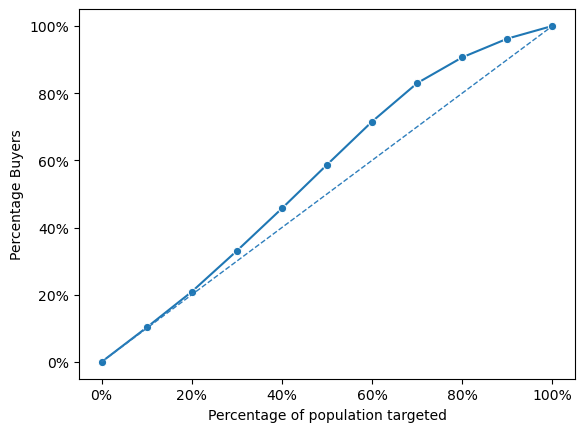

In [49]:
fig = rsm.gains_plot(cg_g3_30k, 'converted', 'yes', 'pred_logit')

In [50]:
roc_auc_score(cg_g3_30k['converted'], cg_g3_30k['pred_logit'])

0.42291126665235146

The gains curve for customers not in Group 2 (rnd_30k == 0) shows a significant drop in performance, with an AUC of 0.4229 compared to 0.8197 (train) and 0.8031 (test) in Part II. This decline occurs because the model was trained on cg_organic, which only includes organic conversions, but was applied to cg_ad_treatment, where users were exposed to ads. Ad exposure likely changed purchasing behavior, making the original predictors less effective. To improve performance, the model should be retrained using ad-exposed users (rnd_30k == 1) instead of relying only on organic data.

## Q6

CG collected data for Group 1 (cg_organic_control) despite already having cg_organic to ensure a proper experimental control. The cg_organic data was collected before the ad experiment, meaning external factors like seasonality or game updates could have influenced conversion rates. By selecting a new randomized control group ***within the same timeframe*** as the ad-exposed groups, CG ensures a ***fair comparison***. This prevents biases that might arise from using older organic conversion data, allowing for an accurate measure of the true impact of ads.

# Part IV

## Q1

In [51]:
clf_ad = rsm.model.logistic(
    data={'cg_treatment': cg_treatment[cg_treatment['rnd_30k'] == 1]},
    rvar='converted',
    lev='yes',
    evar=evars
)
clf_ad.summary(vif=True)

Logistic regression (GLM)
Data                 : cg_treatment
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Null hyp.: There is no effect of x on converted
Alt. hyp.: There is an effect of x on converted

                                OR     OR%  coefficient  std.error  z.value p.value     
Intercept                    0.028  -97.2%        -3.57      0.101  -35.155  < .001  ***
AcquiredSpaceship[yes]       1.092    9.2%         0.09      0.041    2.143   0.032    *
AcquiredIonWeapon[yes]       0.879  -12.1%        -0.13      0.139   -0.929   0.353     
PurchasedCoinPackSmall[yes]  1.036    3.6%         0.04      0.038    0.924   0.

In [52]:
cg_treatment['pred_logit_ad'] = clf_ad.predict(cg_treatment)['prediction']
cg_treatment.head()

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k,pred_logit,pred_logit_ad
0,no,6,16,0,0,0,0,0,yes,no,...,0,no,no,11,1827,no,no,0,0.058321,0.130246
1,no,2,8,0,0,0,5,4,no,no,...,0,yes,no,3,1889,no,yes,1,0.010403,0.041218
2,no,6,1,0,0,0,0,0,no,no,...,0,no,yes,2,1948,yes,no,0,0.025690,0.052002
3,yes,7,16,0,102,1,0,194,no,no,...,0,yes,yes,21,3409,yes,yes,0,0.122049,0.329918
4,no,10,1,1,233,0,23,0,no,no,...,0,no,yes,4,2922,yes,no,0,0.039185,0.074874


## Q2

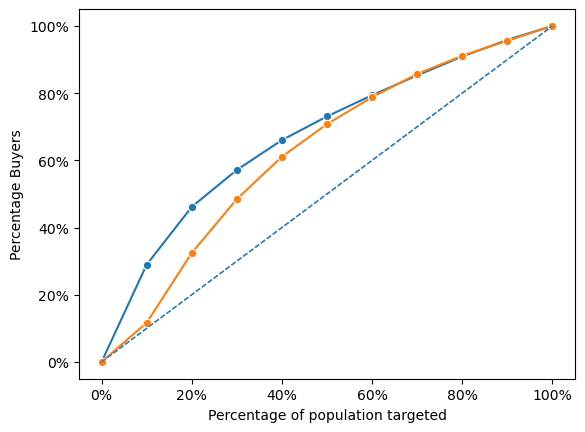

In [53]:
fig = rsm.gains_plot(cg_treatment[cg_treatment['rnd_30k'] != 1], 'converted', 'yes', 'pred_logit_ad')
fig = rsm.gains_plot(cg_treatment[cg_treatment['rnd_30k'] != 1], 'converted', 'yes', 'pred_logit')


In [54]:
roc_auc_score(
    cg_treatment[cg_treatment['rnd_30k'] != 1]['converted'],
    cg_treatment[cg_treatment['rnd_30k'] != 1]['pred_logit']
)

0.6444723410842776

In [55]:
roc_auc_score(
    cg_treatment[cg_treatment['rnd_30k'] != 1]['converted'],
    cg_treatment[cg_treatment['rnd_30k'] != 1]['pred_logit_ad']
)

0.7030674399706047

The original model (Part II) achieved an AUC of 0.8197 (train) and 0.8031 (test), indicating strong predictive power when applied to organic conversions. However, when this model was tested on the 120,000 ad-exposed users, the AUC dropped significantly to 0.6445, suggesting that the model failed to generalize to ad-influenced behavior.

After retraining the model using the 30,000 ad-exposed users from cg_ad_treatment, the new AUC improved to 0.7031 when tested on the 120,000 ad-exposed customers. This shows that the retrained model adapted better to the ad-driven purchasing behavior, performing much better than the original organic model when applied to the same dataset.

## Q3

In [56]:
cg_g3_2 = cg_treatment[cg_treatment['rnd_30k'] != 1]
cg_g3_2_30k = cg_g3_2.sort_values('pred_logit_ad', ascending=False).iloc[0:30000, :]
cg_g3_2_30k.head()

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k,pred_logit,pred_logit_ad
51969,yes,10,10,1,103,11,111,104,yes,no,...,20,no,yes,33,1948,yes,no,0,0.643925,0.860542
21765,yes,10,14,4,5,12,90,482,yes,no,...,3,yes,no,35,1644,yes,no,0,0.895946,0.849863
141628,yes,10,18,9,22,1,53,475,yes,no,...,0,yes,no,38,1736,yes,no,0,0.319902,0.844202
119227,yes,9,24,0,111,0,96,394,yes,no,...,0,no,yes,37,3592,no,no,0,0.139876,0.840149
4330,yes,10,23,0,182,0,2,444,yes,no,...,0,no,no,38,2588,yes,no,0,0.352640,0.824048


In [57]:
resp_rates_g3_2 = cg_g3_2_30k['converted'].value_counts(normalize=True)
resp_rates_g3_2

converted
no     0.7261
yes    0.2739
Name: proportion, dtype: float64

In [58]:
cost_g3_2 = 30000 * cost_ad
profit_g3_2 = 30000 * resp_rates_g3_2.loc['yes'] * margin - cost_g3_2
profit_g3_2

78172.83

#### profit difference: $26457.35

## Q4

Compare the permutation importance plot of the “organic” and the “ad” model.
Explain why you think the plots differ.

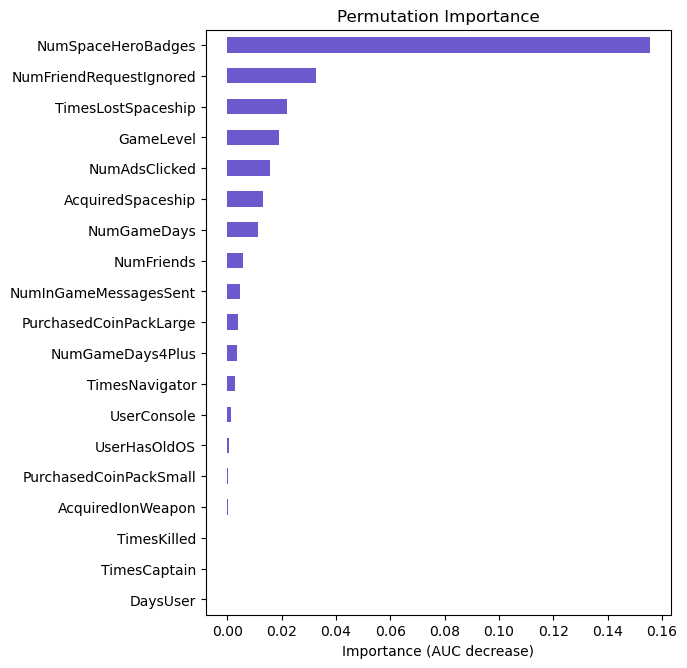

In [59]:
clf.plot('vimp')

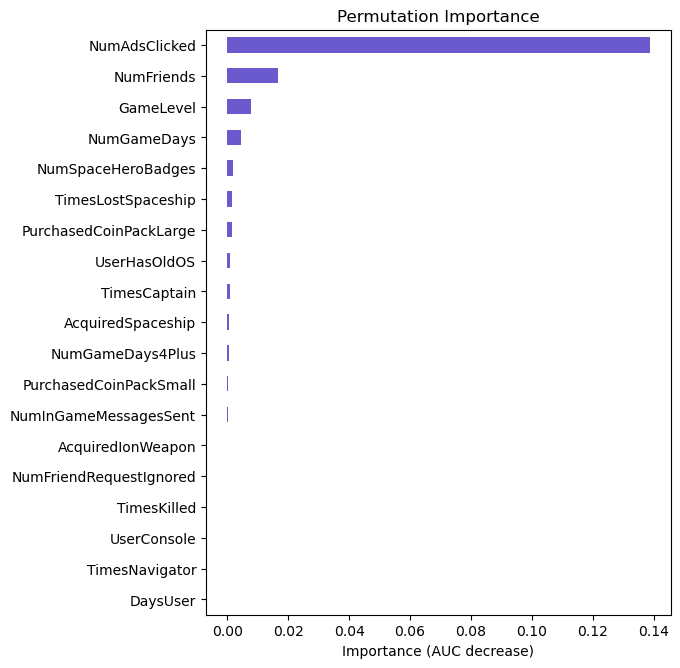

In [60]:
clf_ad.plot('vimp')

The organic model prioritizes ***NumSpaceHeroBadges***, showing that organic conversions are driven by gameplay achievements and engagement. In contrast, the ad-exposed model ranks ***NumAdsClicked*** as the most important feature, indicating that ad interactions play a major role in conversions. This shift occurs because organic buyers convert based on intrinsic engagement, while ad-exposed users are influenced by ad interactions, highlighting the need for an ad-specific model for better predictions.

# Part V

## Q1

Train and tune a neural network on the random sample of customers who were
exposed to the ad campaign (i.e., rnd_30k == 1). Select two hyper parameters
for your grid to tune on. Use both pyrsm and sklearn for estimation and check
the similarity of your results

## pyrsm

In [61]:
clf_ad_nn = rsm.model.mlp(
    data={'cg_treatment': cg_treatment[cg_treatment['rnd_30k'] == 1]},
    rvar='converted',
    lev='yes',
    evar=evars,
    hidden_layer_sizes=(1,),
    mod_type="classification",
)
clf_ad_nn.summary()

Multi-layer Perceptron (NN)
Data                 : cg_treatment
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Model type           : classification
Nr. of features      : (19, 19)
Nr. of weights       : 20
Nr. of observations  : 30,000
Hidden_layer_sizes   : (1,)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 1000000
random_state         : 1234
AUC                  : 0.706

Raw data             :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends

In [62]:
cg_treatment['pred_logit_ad_nn'] = clf_ad_nn.predict(cg_treatment)['prediction']
cg_treatment.head()

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k,pred_logit,pred_logit_ad,pred_logit_ad_nn
0,no,6,16,0,0,0,0,0,yes,no,...,no,no,11,1827,no,no,0,0.058321,0.130246,0.126276
1,no,2,8,0,0,0,5,4,no,no,...,yes,no,3,1889,no,yes,1,0.010403,0.041218,0.046237
2,no,6,1,0,0,0,0,0,no,no,...,no,yes,2,1948,yes,no,0,0.025690,0.052002,0.055321
3,yes,7,16,0,102,1,0,194,no,no,...,yes,yes,21,3409,yes,yes,0,0.122049,0.329918,0.340940
4,no,10,1,1,233,0,23,0,no,no,...,no,yes,4,2922,yes,no,0,0.039185,0.074874,0.075883


In [101]:
from sklearn.model_selection import GridSearchCV

hls = [(1,), (2,), (3,), (4,), (5,), (5, 1), (5, 2), (5, 3), (5, 4)]

param_grid = {
    "hidden_layer_sizes": hls,
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 2]
              }
scoring = {"AUC": "roc_auc"}

clf_cv = GridSearchCV(
    clf_ad_nn.fitted, param_grid, scoring=scoring, cv=5, n_jobs=-1, refit="AUC", verbose=5
)

In [64]:
clf_ad_nn.data_onehot.mean().round(3)

GameLevel                     0.000
NumGameDays                   0.000
NumGameDays4Plus             -0.000
NumInGameMessagesSent        -0.000
NumSpaceHeroBadges            0.000
NumFriendRequestIgnored      -0.000
NumFriends                   -0.000
TimesLostSpaceship           -0.000
TimesKilled                  -0.000
TimesCaptain                  0.000
TimesNavigator                0.000
NumAdsClicked                 0.000
DaysUser                     -0.000
AcquiredSpaceship_yes         0.297
AcquiredIonWeapon_yes         0.018
PurchasedCoinPackSmall_yes    0.342
PurchasedCoinPackLarge_yes    0.267
UserConsole_yes               0.828
UserHasOldOS_yes              0.085
dtype: float64

In [102]:
clf_cv.fit(clf_ad_nn.data_onehot, clf_ad_nn.data.converted)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=MLPClassifier(activation='tanh', hidden_layer_sizes=(1,),
                                     max_iter=1000000, random_state=1234,
                                     solver='lbfgs'),
             n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 2],
                         'hidden_layer_sizes': [(1,), (2,), (3,), (4,), (5,),
                                                (5, 1), (5, 2), (5, 3),
                                                (5, 4)]},
             refit='AUC', scoring={'AUC': 'roc_auc'}, verbose=5)

In [107]:
clf_ad_nn.data_onehot.head()

,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,TimesLostSpaceship,TimesKilled,TimesCaptain,TimesNavigator,NumAdsClicked,DaysUser,AcquiredSpaceship_yes,AcquiredIonWeapon_yes,PurchasedCoinPackSmall_yes,PurchasedCoinPackLarge_yes,UserConsole_yes,UserHasOldOS_yes
1,-1.562310,-0.622508,-0.410992,-0.691781,-0.371999,-0.729964,-0.482059,-0.320636,-0.081651,0.868067,-0.206064,-0.842604,-1.120787,False,False,True,False,False,True
11,-0.478309,0.360651,-0.410992,0.963396,-0.371999,0.581947,3.191052,1.366772,-0.081651,0.332358,0.410387,-0.988806,-1.997150,True,False,False,False,True,False
16,0.244358,-0.762959,-0.410992,1.777114,-0.371999,0.990097,-0.523100,0.062866,-0.081651,-0.203351,-0.206064,-1.135009,1.402716,False,False,False,True,True,False
19,-0.839643,-1.184313,-0.410992,-0.358896,-0.371999,-0.875731,-0.523100,-0.320636,-0.081651,-0.203351,-0.206064,-0.988806,0.437359,False,False,False,False,True,False
21,0.605692,0.641553,-0.410992,1.361008,4.094315,0.960943,-0.317898,0.446368,-0.081651,1.001994,0.718613,-0.696401,-0.663751,True,False,True,False,True,False


In [108]:
pd.DataFrame(clf_cv.cv_results_).iloc[:, 5:].sort_values("rank_test_AUC")

,param_hidden_layer_sizes,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC
44,"(5, 4)","{'alpha': 1, 'hidden_layer_sizes': (5, 4)}",0.767908,0.776289,0.797805,0.790099,0.773677,0.781156,0.011066,1
17,"(5, 4)","{'alpha': 0.001, 'hidden_layer_sizes': (5, 4)}",0.768324,0.775901,0.788623,0.789690,0.777087,0.779925,0.008122,2
53,"(5, 4)","{'alpha': 2, 'hidden_layer_sizes': (5, 4)}",0.768144,0.772335,0.786906,0.787636,0.783523,0.779709,0.007966,3
16,"(5, 3)","{'alpha': 0.001, 'hidden_layer_sizes': (5, 3)}",0.767632,0.780197,0.791468,0.781333,0.775402,0.779206,0.007801,4
6,"(5, 2)","{'alpha': 0.0001, 'hidden_layer_sizes': (5, 2)}",0.773090,0.773206,0.786401,0.786268,0.773288,0.778451,0.006438,5
35,"(5, 4)","{'alpha': 0.1, 'hidden_layer_sizes': (5, 4)}",0.764861,0.780909,0.788246,0.777557,0.776759,0.777667,0.007580,6
25,"(5, 3)","{'alpha': 0.01, 'hidden_layer_sizes': (5, 3)}",0.766952,0.772180,0.791913,0.780579,0.771773,0.776679,0.008789,7
7,"(5, 3)","{'alpha': 0.0001, 'hidden_layer_sizes': (5, 3)}",0.760987,0.773928,0.791204,0.778286,0.777002,0.776281,0.009661,8
24,"(5, 2)","{'alpha': 0.01, 'hidden_layer_sizes': (5, 2)}",0.771859,0.771114,0.786527,0.787620,0.762393,0.775903,0.009716,9
13,"(5,)","{'alpha': 0.001, 'hidden_layer_sizes': (5,)}",0.767688,0.771483,0.778736,0.787551,0.774005,0.775892,0.006846,10


In [109]:
clf_cv.best_params_

{'alpha': 1, 'hidden_layer_sizes': (5, 4)}

In [110]:
clf_cv.best_score_.round(3)

0.781

In [111]:
clf_ad_nn2 = rsm.model.mlp(
    data={'cg_treatment': cg_treatment[cg_treatment['rnd_30k'] == 1]},
    rvar='converted',
    lev='yes',
    evar=evars,
    hidden_layer_sizes=(5,4),
    alpha=1,
    mod_type="classification",
)
clf_ad_nn2.summary()

Multi-layer Perceptron (NN)
Data                 : cg_treatment
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Model type           : classification
Nr. of features      : (19, 19)
Nr. of weights       : 119
Nr. of observations  : 0
Hidden_layer_sizes   : (5, 4)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 1
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 1000000
random_state         : 1234
AUC                  : 0.791

Raw data             :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends Acquir

In [112]:
cg_treatment['pred_logit_ad_nn2'] = clf_ad_nn2.predict(cg_treatment)['prediction']
cg_treatment.head()

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k,pred_logit,pred_logit_ad,pred_logit_ad_nn,pred_logit_ad_nn2,pred_rf
0,no,6,16,0,0,0,0,0,yes,no,...,11,1827,no,no,0,0.058321,0.130246,0.126276,0.045496,0.975
1,no,2,8,0,0,0,5,4,no,no,...,3,1889,no,yes,1,0.010403,0.041218,0.046237,0.055567,NaN
2,no,6,1,0,0,0,0,0,no,no,...,2,1948,yes,no,0,0.025690,0.052002,0.055321,0.052414,0.940
3,yes,7,16,0,102,1,0,194,no,no,...,21,3409,yes,yes,0,0.122049,0.329918,0.340940,0.482574,0.700
4,no,10,1,1,233,0,23,0,no,no,...,4,2922,yes,no,0,0.039185,0.074874,0.075883,0.033834,0.950


## sklearn

In [146]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

### RUN ONLY ON FULL RUNS

In [ ]:
cat_features.remove('converted')

In [186]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming cg_treatment, evars, num_features, and cat_features are already defined
X_train = cg_treatment[cg_treatment['rnd_30k'] == 1][evars].copy()
X_cat = pd.get_dummies(X_train[cat_features].copy(), drop_first=False)
X_cat = X_cat[[col for col in X_cat.columns if "_no" not in col]]
y_train = cg_treatment[cg_treatment['rnd_30k'] == 1]['converted']

scaler = StandardScaler()
X_num = pd.DataFrame(scaler.fit_transform(X_train[num_features]), columns=num_features)
X_train = pd.concat([X_cat.reset_index(drop=True), X_num.reset_index(drop=True)], axis=1)
X_train

,AcquiredSpaceship_yes,AcquiredIonWeapon_yes,PurchasedCoinPackSmall_yes,PurchasedCoinPackLarge_yes,UserConsole_yes,UserHasOldOS_yes,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,TimesLostSpaceship,TimesKilled,TimesCaptain,TimesNavigator,NumAdsClicked,DaysUser
0,False,False,True,False,False,True,-1.562310,-0.622508,-0.410992,-0.691781,-0.371999,-0.729964,-0.482059,-0.320636,-0.081651,0.868067,-0.206064,-0.842604,-1.120787
1,True,False,False,False,True,False,-0.478309,0.360651,-0.410992,0.963396,-0.371999,0.581947,3.191052,1.366772,-0.081651,0.332358,0.410387,-0.988806,-1.997150
2,False,False,False,True,True,False,0.244358,-0.762959,-0.410992,1.777114,-0.371999,0.990097,-0.523100,0.062866,-0.081651,-0.203351,-0.206064,-1.135009,1.402716
3,False,False,False,False,True,False,-0.839643,-1.184313,-0.410992,-0.358896,-0.371999,-0.875731,-0.523100,-0.320636,-0.081651,-0.203351,-0.206064,-0.988806,0.437359
4,True,False,True,False,True,False,0.605692,0.641553,-0.410992,1.361008,4.094315,0.960943,-0.317898,0.446368,-0.081651,1.001994,0.718613,-0.696401,-0.663751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,True,True,False,False,-0.478309,-1.605666,-0.410992,-0.691781,-0.371999,-0.875731,-0.523100,-0.320636,-0.081651,-0.203351,-0.206064,0.327016,-0.389227
29996,True,False,True,False,True,False,0.967025,-0.060703,-0.410992,0.029469,-0.371999,0.844329,-0.512840,0.906570,-0.081651,-0.203351,0.564500,-0.988806,-0.986542
29997,True,False,False,False,True,True,0.967025,0.922455,-0.120010,1.814101,-0.371999,1.194172,0.451609,0.753169,-0.081651,-0.203351,0.256274,-0.988806,0.300098
29998,False,False,False,False,True,False,1.328359,1.484260,-0.410992,0.010976,2.307789,-0.292660,0.574730,2.593978,-0.081651,-0.069423,-0.206064,0.034611,0.852161


In [189]:
mlp = MLPClassifier(hidden_layer_sizes=(1,), random_state=1234, activation='tanh', solver='lbfgs', alpha=0.0001, max_iter=1_000_000)
mlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(1,), max_iter=1000000,
              random_state=1234, solver='lbfgs')

In [193]:
y_train.shape

(30000,)

In [202]:
sk_probs = mlp.predict_proba(X_train)[:,1]
roc_auc_score(y_train, sk_probs)

0.7063217204034024

In [204]:
param_grid = {
    "hidden_layer_sizes": hls,
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 2]
              }
scoring = {"AUC": "roc_auc"}

sk_cv = GridSearchCV(
    mlp, param_grid, scoring=scoring, cv=5, n_jobs=-1, refit="AUC", verbose=5
)
sk_cv.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=MLPClassifier(activation='tanh', hidden_layer_sizes=(1,),
                                     max_iter=1000000, random_state=1234,
                                     solver='lbfgs'),
             n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 2],
                         'hidden_layer_sizes': [(1,), (2,), (3,), (4,), (5,),
                                                (5, 1), (5, 2), (5, 3),
                                                (5, 4)]},
             refit='AUC', scoring={'AUC': 'roc_auc'}, verbose=5)

In [208]:
sk_cv.best_params_

{'alpha': 1, 'hidden_layer_sizes': (5, 4)}

In [207]:
sk_proba = sk_cv.predict_proba(X_train)[:,1]
roc_auc_score(y_train, sk_proba)

0.7972247535818806

# Q2

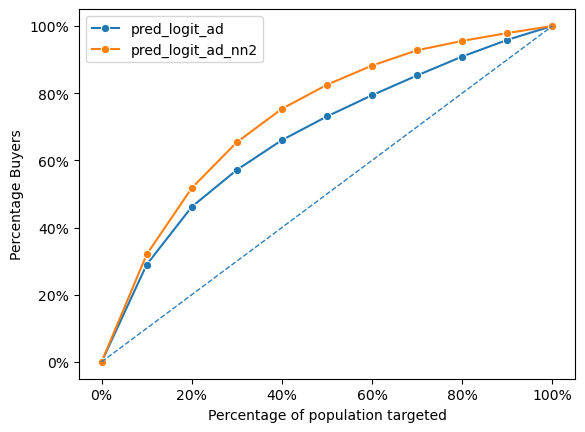

In [205]:
fig2 = rsm.gains_plot(cg_treatment[cg_treatment['rnd_30k'] != 1], 'converted', 'yes', ['pred_logit_ad','pred_logit_ad_nn2'])

In [114]:
#Logistic AUC from part IV
roc_auc_score(
    cg_treatment[cg_treatment['rnd_30k'] != 1]['converted'],
    cg_treatment[cg_treatment['rnd_30k'] != 1]['pred_logit_ad']
)

0.7030674399706047

In [115]:
#Neural Network AUC
roc_auc_score(
    cg_treatment[cg_treatment['rnd_30k'] != 1]['converted'],
    cg_treatment[cg_treatment['rnd_30k'] != 1]['pred_logit_ad_nn2']
)

0.7709805267373835

Comparing the **Gains Plot** and **AUC** between the Neural Network ('ad') model and the Logistic Regression ('ad') model, we observe that there's a significant difference in performance between the two.  

- Logistic Regression AUC: **0.7031**  
- Neural Network AUC: **0.7710**  

The higher AUC of the Neural Network indicates stronger discriminatory power. Its Gains Plot captures a higher percentage of buyers as the population percentage increases, demonstrating more effective identification of positive cases than Logistic Regression.

# Q3

In [116]:
cg_g3_nn = cg_treatment[cg_treatment['rnd_30k'] != 1]
cg_g3_nn

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k,pred_logit,pred_logit_ad,pred_logit_ad_nn,pred_logit_ad_nn2,pred_rf
0,no,6,16,0,0,0,0,0,yes,no,...,11,1827,no,no,0,0.058321,0.130246,0.126276,0.045496,0.975
2,no,6,1,0,0,0,0,0,no,no,...,2,1948,yes,no,0,0.025690,0.052002,0.055321,0.052414,0.940
3,yes,7,16,0,102,1,0,194,no,no,...,21,3409,yes,yes,0,0.122049,0.329918,0.340940,0.482574,0.700
4,no,10,1,1,233,0,23,0,no,no,...,4,2922,yes,no,0,0.039185,0.074874,0.075883,0.033834,0.950
5,no,1,6,0,0,0,0,0,no,no,...,9,3470,yes,no,0,0.018541,0.078585,0.077819,0.021316,0.980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149994,no,9,17,0,0,0,2,49,no,no,...,3,2313,no,no,0,0.037411,0.083973,0.083291,0.258859,0.915
149996,no,7,19,0,0,0,0,0,no,no,...,1,3166,yes,no,0,0.038769,0.057251,0.059992,0.034827,0.955
149997,no,1,5,0,207,0,37,10,yes,no,...,5,2619,yes,no,0,0.013292,0.056848,0.059547,0.060651,0.925
149998,no,7,19,1,0,0,88,0,no,no,...,9,2343,no,no,0,0.010421,0.110083,0.107279,0.052557,0.925


In [117]:
#select best 30,000 customers 
cg_g3_nn_30k = cg_g3_nn.sort_values('pred_logit_ad_nn2', ascending=False).iloc[0:30000, :]
cg_g3_nn_30k.head()

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k,pred_logit,pred_logit_ad,pred_logit_ad_nn,pred_logit_ad_nn2,pred_rf
88738,yes,7,18,0,59,8,115,410,no,no,...,32,2769,yes,no,0,0.090119,0.653936,0.634365,0.857924,0.475
22626,yes,9,12,0,0,3,93,426,yes,no,...,36,3623,no,no,0,0.248392,0.817971,0.757237,0.843875,0.370
4555,no,10,13,1,190,2,59,2,no,no,...,38,2647,no,no,0,0.101710,0.677948,0.661704,0.829656,0.455
126169,no,3,16,0,0,0,0,7,yes,no,...,37,2831,yes,no,0,0.115452,0.598112,0.596857,0.826378,0.340
36508,no,5,5,5,20,0,2,33,yes,no,...,37,2953,yes,no,0,0.125357,0.604176,0.602122,0.823396,0.455


In [118]:
#response rates
resp_rates_g3_nn = cg_g3_nn_30k['converted'].value_counts(normalize=True)
resp_rates_g3_nn

converted
no     0.688267
yes    0.311733
Name: proportion, dtype: float64

In [119]:
#cost
cost_g3_nn = 30000 * cost_ad
cost_g3_nn

45000.0

In [120]:
#Neural Network Profit
profit_g3_nn = 30000 * resp_rates_g3_nn.loc['yes'] * margin - cost_g3_nn
profit_g3_nn

95186.48000000001

In [121]:
#Logistic regression Profit
profit_g3_2

78172.83

In [122]:
#Organic Profit 
profit_g3

51715.479999999996

In [123]:
#Neural Network Improvement
(profit_g3_nn-profit_g3)/profit_g3 * 100

84.05800352234964

In [124]:
#Logistic Improvement
(profit_g3_2-profit_g3)/profit_g3 * 100

51.15944007480934

### **Profit Improvement**  

The Neural Network model demonstrates a significantly higher profit improvement compared to Logistic Regression:  

- **Neural Network**  
  - Profit: $95,186.48  
  - Improvement: **+84.06%**  

- **Logistic Regression**  
  - Profit: $78,172.83  
  - Improvement: **+51.16%**  

The Neural Network outperforms Logistic Regression in both absolute profit and percentage improvement, reinforcing its superior predictive performance.

# Q4

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.metrics import roc_auc_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 400, 500],  # Different values for the number of trees
    'max_features': ['sqrt', 'log2', None, 0.2, 0.5]  # Different values for max_features
}

# Extract the training data
X_train = cg_treatment.loc[cg_treatment["rnd_30k"] == 1, evars]
y_train = cg_treatment.loc[cg_treatment["rnd_30k"] == 1, "converted"]

# Convert categorical variables to dummy variables
X_train = pd.get_dummies(X_train, drop_first=True)
y_train = y_train.cat.codes

# Initialize the random forest model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Output the best parameters
print(f"Best hyperparameters: {grid_search.best_params_}")

Best hyperparameters: {'max_features': 0.2, 'n_estimators': 500}


In [126]:
# Predict probabilities for the test set
X_test = cg_treatment.loc[cg_treatment["rnd_30k"] != 1, evars]
X_test = pd.get_dummies(X_test, drop_first=True)
y_test = cg_treatment.loc[cg_treatment["rnd_30k"] != 1, "converted"].cat.codes

# Predict probabilities
y_pred_rf = best_rf.predict_proba(X_test)[:, 1]

# Calculate AUC
auc_rf = roc_auc_score(y_test, y_pred_rf)
print(f"AUC: {auc_rf}")

AUC: 0.7800532097890249


# Q5

AUC for the logistic regression: 0.7030674399706047
AUC for the random forest: 0.7800532097890249


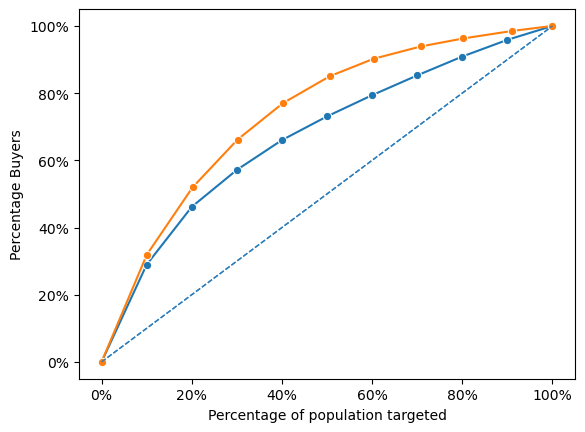

In [127]:
# Gains curve for the logistic regression "ad" model
fig_logistic = rsm.gains_plot(cg_treatment[cg_treatment['rnd_30k'] != 1], 'converted', 'yes', 'pred_logit_ad')

# Add predictions from the random forest model to the DataFrame
cg_treatment.loc[cg_treatment['rnd_30k'] != 1, 'pred_rf'] = y_pred_rf

# Gains curve for the random forest "ad" model
fig_rf = rsm.gains_plot(cg_treatment[cg_treatment['rnd_30k'] != 1], 'converted', 'yes', 'pred_rf')

# AUC for the logistic regression "ad" model
print(f"AUC for the logistic regression: {roc_auc_score(cg_treatment[cg_treatment['rnd_30k'] != 1]['converted'], cg_treatment[cg_treatment['rnd_30k'] != 1]['pred_logit_ad'])}")
print(f"AUC for the random forest: {auc_rf}")

#### Random Forest provides better predictive performance than Logistic Regression:

The AUC of 0.780 (RF) is significantly higher than 0.703 (LR).
This suggests that the Random Forest model is more effective at identifying potential buyers of the Zalon campaign.

#### The gains curve shows a clear advantage for Random Forest:

Across all targeted customers, Random Forest consistently outperforms Logistic Regression.
Particularly in the top 50% of targeted users, Random Forest shows a substantial improvement, indicating it is better at distinguishing high-purchase-propensity customers.

#### Random Forest is a better choice for optimizing ad targeting:

Since the goal of ad targeting is to maximize conversions by accurately identifying high-propensity buyers, Random Forest is the better model.
This suggests that using the Random Forest model for customer targeting will yield a higher ROI (Return on Investment) compared to Logistic Regression.

# Q6

In [128]:
cg_g3_rf = cg_treatment[cg_treatment['rnd_30k'] != 1]
cg_g3_rf

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k,pred_logit,pred_logit_ad,pred_logit_ad_nn,pred_logit_ad_nn2,pred_rf
0,no,6,16,0,0,0,0,0,yes,no,...,11,1827,no,no,0,0.058321,0.130246,0.126276,0.045496,0.986
2,no,6,1,0,0,0,0,0,no,no,...,2,1948,yes,no,0,0.025690,0.052002,0.055321,0.052414,0.942
3,yes,7,16,0,102,1,0,194,no,no,...,21,3409,yes,yes,0,0.122049,0.329918,0.340940,0.482574,0.688
4,no,10,1,1,233,0,23,0,no,no,...,4,2922,yes,no,0,0.039185,0.074874,0.075883,0.033834,0.940
5,no,1,6,0,0,0,0,0,no,no,...,9,3470,yes,no,0,0.018541,0.078585,0.077819,0.021316,0.970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149994,no,9,17,0,0,0,2,49,no,no,...,3,2313,no,no,0,0.037411,0.083973,0.083291,0.258859,0.908
149996,no,7,19,0,0,0,0,0,no,no,...,1,3166,yes,no,0,0.038769,0.057251,0.059992,0.034827,0.948
149997,no,1,5,0,207,0,37,10,yes,no,...,5,2619,yes,no,0,0.013292,0.056848,0.059547,0.060651,0.914
149998,no,7,19,1,0,0,88,0,no,no,...,9,2343,no,no,0,0.010421,0.110083,0.107279,0.052557,0.932


In [129]:
cg_g3_rf_30k = cg_g3_rf.sort_values('pred_rf', ascending=True).iloc[0:30000, :]
cg_g3_rf_30k.head()

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k,pred_logit,pred_logit_ad,pred_logit_ad_nn,pred_logit_ad_nn2,pred_rf
144199,yes,10,21,0,0,0,0,16,no,no,...,30,2984,yes,no,0,0.103939,0.513146,0.522701,0.610391,0.210
72301,yes,1,14,11,21,0,2,5,yes,no,...,33,2588,yes,no,0,0.100610,0.462665,0.469949,0.755377,0.230
134480,yes,10,14,0,72,0,0,11,yes,no,...,37,2162,yes,no,0,0.187038,0.635556,0.627169,0.688244,0.232
149410,yes,10,18,0,178,0,113,9,no,no,...,36,2739,no,no,0,0.047473,0.657504,0.649032,0.530556,0.234
11862,yes,8,18,0,346,3,110,24,no,no,...,30,3470,yes,no,0,0.124457,0.466017,0.481060,0.660807,0.238


In [130]:
resp_rates_g3_rf = cg_g3_rf_30k['converted'].value_counts(normalize=True)
resp_rates_g3_rf

converted
no     0.688
yes    0.312
Name: proportion, dtype: float64

In [131]:
cost_g3_rf = 30000 * cost_ad
cost_g3_rf

45000.0

In [132]:
profit_g3_rf = 30000 * resp_rates_g3_rf.loc['yes'] * margin - cost_g3_rf
profit_g3_rf

95306.4

In [133]:
(profit_g3_rf-profit_g3)/profit_g3 * 100

84.28988766999746

### Profit Improvement
- **Random Forest**
    - profit: $95306.4
    - Improvement: +84.30%